In [1]:
# TensorFlow
import tensorflow as tf
print(tf.__version__)

2.10.0


In [7]:
# Load in the data
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
print("X_train.shape: ", X_train.shape)

X_train.shape:  (60000, 28, 28)


In [8]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2976 - accuracy: 0.9125 - val_loss: 0.1455 - val_accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1444 - accuracy: 0.9571 - val_loss: 0.1139 - val_accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1086 - accuracy: 0.9676 - val_loss: 0.0899 - val_accuracy: 0.9716
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0872 - accuracy: 0.9729 - val_loss: 0.0783 - val_accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0752 - accuracy: 0.9765 - val_loss: 0.0717 - val_accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0663 - accuracy: 0.9791 - val_loss: 0.0691 - val_accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0572 - accuracy: 0.9814 - val_loss: 0.0658 - val_accuracy:

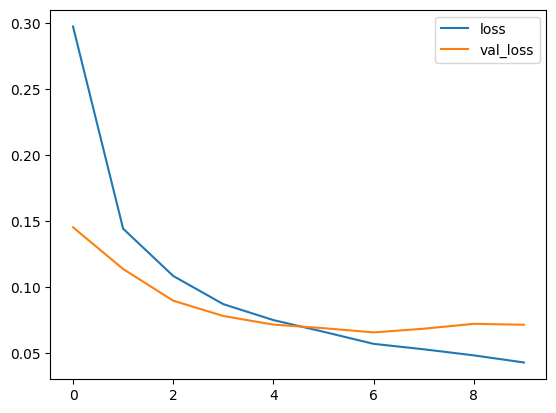

In [11]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

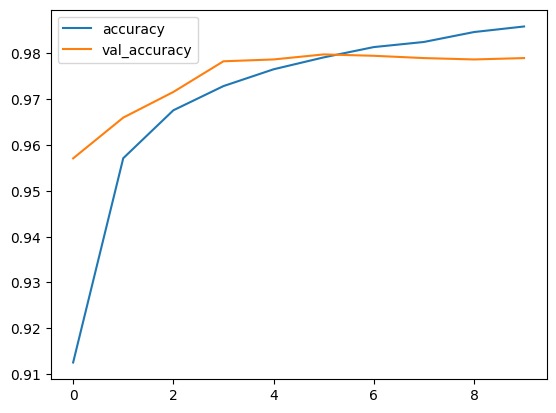

In [15]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [16]:
# Evaluate the model
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9790
[0.07163972407579422, 0.9789999723434448]


313/313 [==============================] - 0s 1ms/step
Confusion Matrix without normalization


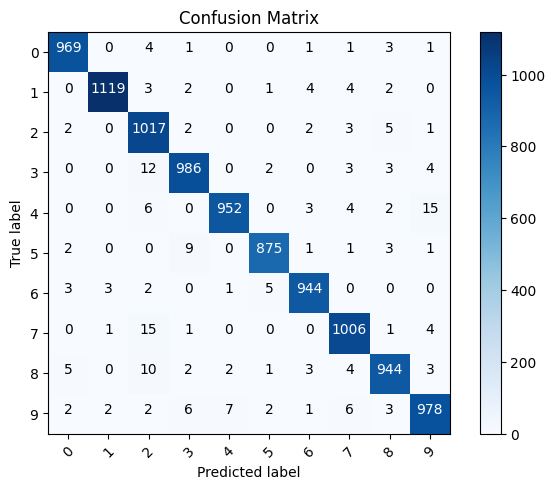

In [18]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix without normalization")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



Text(0.5, 1.0, 'True label: 1 Predicted: 2')

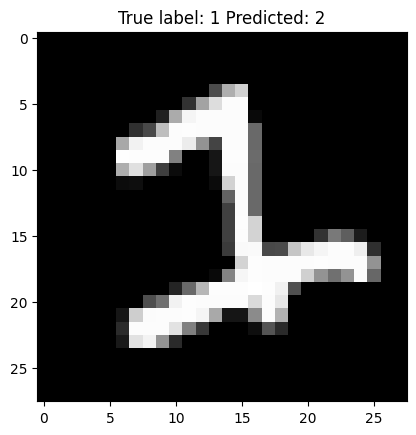

In [23]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (y_test[i], p_test[i]))